<a href="https://colab.research.google.com/github/ShengruiLYU/MOSEI_UMONS/blob/master/multilogue-net/analysis/error_analysis_lav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ShengruiLYU/MOSEI_UMONS

In [ ]:
!unzip jige.zip
!unzip transcript.zip

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('MOSEI_UMONS/multilogue-net/analysis/regression_lav.csv',
                 usecols=['sample_id', 'diff', 'label_class', 'pred_class'])

In [ ]:
def group_by_error(df_input):
    df = df_input.drop(['diff', 'sample_id'], axis=1)
    df['wrong_count'] = (df.label_class != df.pred_class)
    return df[df.wrong_count].groupby(['label_class', 'pred_class']).sum()

In [ ]:
group_by_error(df)

wrong_count
label_class pred_class             
-3          -2                  411
            -1                  317
             1                   21
-2          -3                   21
            -1                 1269
             1                  225
             2                    4
-1          -3                    1
            -2                  260
             1                 1031
             2                   22
 0          -3                    3
            -2                   87
            -1                 1443
             1                 2507
             2                  133
 1          -2                   30
            -1                  939
             2                  538
 2          -2                    5
            -1                  170
             1                 1714
             3                    2
 3          -1                   21
             1                  282
             2                  246

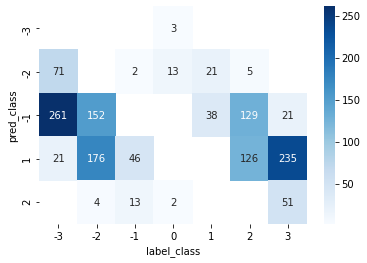

In [ ]:
wrong_df = group_by_error(df[df['diff'] > 1.5])

sns.heatmap(wrong_df.reset_index().pivot(
    columns='label_class', index='pred_class', values='wrong_count'),
    cmap="Blues", annot=True, fmt=".0f")

In [ ]:
wrong_df = group_by_error(df[df['diff'] > 2.0]).sort_values(by='wrong_count')

wrong_df

,,wrong_count
label_class,pred_class,
0,-3,3
-2,2,4
2,-2,5
-1,2,6
1,-2,8
-3,1,21
3,-1,21
2,-1,63
-2,1,67


Text(0.5, 0, 'label_class')

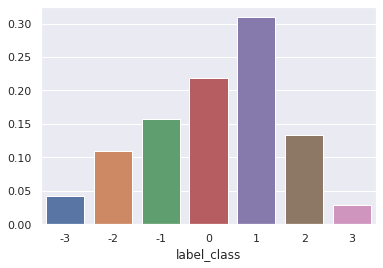

In [ ]:
dist_df = df.label_class.value_counts(normalize=True).sort_index()
sns.set()
ax = sns.barplot(x=dist_df.index, y=dist_df.values)
ax.set_xlabel('label_class')

In [ ]:
pd.set_option('display.max_rows', 100)
look_df = df[(df['diff'] > 2.0) & (df.label_class < 0) & (df.pred_class > 0)]

In [ ]:
look_df.iloc[0]

sample_id      XQOUZhWI1B0:2
diff                 3.50775
label_class               -3
pred_class                 1
Name: 0, dtype: object

In [ ]:
import os

def get_transcript(idx, verbose=False):
    if verbose:
        print(df.loc[idx])
    file_path = df.loc[idx].sample_id.replace(':', '_')

    if os.path.exists('jige/{}.mp4'.format(file_path)):
        video_id, clip_id = file_path.rsplit('_', 1)
        transcript = pd.read_csv('Combined/{}.txt'.format(video_id), header=None, sep='___', engine='python')
        if verbose:
            print(transcript[4])
        line = transcript[transcript[1] == int(clip_id)].values[0][4]
        return df.loc[idx]['label_class'], df.loc[idx]['pred_class'], line
    
    return None

In [ ]:
get_transcript(0, verbose=True)

sample_id      XQOUZhWI1B0:2
diff                 3.50775
label_class               -3
pred_class                 1
Name: 0, dtype: object
0    Maam, I replaced the first burger free because...
1     Now you're telling me that this burger is bur...
2    25 an hour, and I have to put up with the like...
3     I'll tell you what, why don't you come back h...
4     You got to smile nice for all the customers w...
Name: 4, dtype: object


(-3, 1, '25 an hour, and I have to put up with the likes of you')

In [ ]:
for idx in look_df.index:
    line = get_transcript(idx)
    if line is not None:
        print(idx, '\t', df.loc[idx].sample_id, '\t', line)

0 	 XQOUZhWI1B0:2 	 (-3, 1, '25 an hour, and I have to put up with the likes of you')
7 	 SI39azgVUR8:1 	 (-3, 1, 'I tried so many different diet plans that all turned out to be bogus, I was so frustrated that I was still overweight!')
8 	 XQOUZhWI1B0:1 	 (-3, 1, " Now you're telling me that this burger is burnt? You have got to be kidding me! Where do you think we are? This is McDonald's! We ain't serving no sirloin steak! $5")
13 	 WoL4fCxGd8Q:0 	 (-3, 1, "Hey everybody what's up I wanted to do a review of the new Kanye West, Paul McCartney and Rihanna Collaboration Four Five Seconds.")
18 	 8P0zm2oYDyY:1 	 (-3, 1, 'Contacted 311 who transferred me to the Department of Consumer Affair and I never knew I could do anything like this.')
20 	 233356:8 	 (-3, 1, ' In fact I think it speaks to the moral bankruptcy of our culture {laugh} and my own bad taste that I would go to this movie')
22 	 KI2sU-mhM44:3 	 (-3, 1, 'To just bring down, at a minimum, bring down the interest payments on th

In [ ]:
"""
Observation: some videos have several seconds of leading blank or completely blank

Error cases (label- pred+):
1. video is clearly negative but the transcript contains some positive words, e.g., XQOUZhWI1B0:2,4, bdtwQxwySN0:8
2. word is clearly negative but the video has some smile, e.g., SI39azgVUR8:1 (an interview?), 2QXHdu2zlQY:0
3. negative review of something in the words but not conveyed through expression
   or even laughed to mitigate embarassment, e.g., 233356:8, 202810:4, Yi6Qyn4X8is:5, 90172:11, 209775:4
4. word ambiguity and/or sarcasm, e.g., 259260:29
5. wrong labels? video clearly positive, e.g., 2BuFtglEcaY:7
6. mixed sentiment in two clauses, e.g., 209775:4
""" 

In [ ]:
pd.set_option('display.max_colwidth', 200)
get_transcript(50, True)

sample_id      130633:7
diff            2.61096
label_class           3
pred_class           -1
Name: 50, dtype: object
0                                                                                                                                        Alright (uhh) this is going to be a review of a foreign film Old Boy
1                                                                                                               This film comes (uhh) from Korea and it is highly regarded as (uhh) just a great film overall
2                                               (uhh) I'm not, I can't go into the plot or the storyline without giving anything away, without giving (stutter) any spoilers away, but I can set up the story
3                                                                                                                                  (uhh) Dae-Su is a Korean man who one day gets locked up in this hotel room
4                                                       

(3,
 -1,
 " If you're not into foreign films, you probably will be after watching this")

In [ ]:
look_df = df[(df['diff'] > 2.0) & (df.label_class > 0) & (df.pred_class < 0)]
for idx in look_df.index:
    line = get_transcript(idx)
    if line is not None:
        print(idx, '\t', df.loc[idx].sample_id, '\t', line)

1 	 256976:12 	 (2, -2, ' I would just wait for it to come out on a network television when it gets replayed three times for a weekend and then every other weekend for the rest of its life')
4 	 237363:4 	 (2, -2, ' (uhh) This movie is a musical')
5 	 275620:7 	 (3, -1, " It is about (umm) a (uhh) a Vulcan who commandeers the Enterprise, cast and crew and all, and (uhh) tries to find God at the end of space and it's (uhh) just as obnoxious as it sounds")
9 	 52839:4 	 (3, -1, " (umm) Steven Spielberg won a ton of like, (uhh) highest honors from the army and stuff like that too, that that's (stutter) how good this movie was, like it was very realistic and it told from the perspective of a soldier")
10 	 266938:38 	 (3, -1, " He can get back into that, I don't know what's wrong with him why is he doing this, I'm really pissed off at this movie")
12 	 266396:34 	 (3, -1, ' And he holds the movie up')
14 	 225343:14 	 (3, -1, " (umm) So if I had to recommend this one I would probably stay 

In [ ]:
"""
Observation:
a higher ratio of uhh, umm, stutter (or broken sentence) in text even though words are good
a lot don't have videos although words are very good (e.g., 244261:2 )

Error cases (label+ pred-):
1. positive review of something in the words but not conveyed through expression, e.g., 136211:5
2. wrong labels? clearly negative, e.g., 225343:14, 266938:38 & 229090:19 & 190740:9 (no visual),
   225416:14 (mixed sentiment), 92521:7, 128949:7, 216007:2
3. Neutral introductions to the plots, e.g., RTzDzj4NxIM:6, 
""" 

In [ ]:
look_df = df[(df['diff'] > 2.0) & (df.label_class > 0) & (df.pred_class > 0)]
for idx in look_df.index:
    line = get_transcript(idx)
    if line is not None:
        print(idx, '\t', df.loc[idx].sample_id, '\t', line)

11 	 91844:3 	 (3, 1, " This is Bound uhh starring Jennifer Tilly, Gina Gershon, and Joe Pantoliano and Patoliano is incredible in this movie, I've never seen him play a part this well")
29 	 209354:6 	 (3, 1, ' This movie is full of action, intensity, I really like what they do with the vampires and the werewolves')
39 	 91844:0 	 (3, 1, "Hi I'm Marshal Hammer and right now I want to share with you this film, I've got it on DVD")
44 	 210618:3 	 (3, 1, " So he (umm) you know, really thinks that he's never you know, that he's not gonna go anywhere")
48 	 227426:12 	 (3, 1, " It's just she did not pull this role off")
49 	 125730:5 	 (3, 1, ' I had never seen the other shows, but I thoroughly enjoyed this one')
52 	 53766:7 	 (3, 1, ' They are not really autographed by they have their signatures on them from Geddy Lee and Alex Lifeson and also has a (uhh) great little booklet of photos with (uhh) other trinkets it thrown in like stickers, (uhh) (stutter) and a replica of a backstage pas

In [ ]:
"""
All have underestimated sentiment. Never overestimates.

Label seems exaggerated sometimes, e.g., 
"""

In [ ]:
look_df = df[(df['diff'] > 2.0) & (df.label_class < 0) & (df.pred_class < 0)]
for idx in look_df.index:
    line = get_transcript(idx)
    if line is not None:
        print(idx, '\t', df.loc[idx].sample_id, '\t', line)

27 	 255224:6 	 (-3, -1, ' (uhh) If if (stutter) you were sleeping or comatose in the film you might enjoy it')
30 	 291121:7 	 (-3, -1, ' (umm) In the novels Becky Bloomwood is, you know, I think that her character is a little bit smarter but in this movie she comes off as very dumb')
41 	 7oFimEZJQ_A:0 	 (-3, -1, "Hi, it's Craig Fugate at FEMA.")
43 	 135623:7 	 (-3, -1, " I feel like there's a lot of movies that have come out recently based on comic books that are way better than the Spider Man ones and it's just kind of a disappointment")
46 	 210259:5 	 (-3, -1, " The other scene is back in Afghanistan and there's a platoon of, you know, the army, the marines who are kind of fighting, and the third is actually a philosophy professor who's talking to his student in his office")
54 	 210259:11 	 (-3, -1, " It's it's (stutter) not at all good, I'm sorry for the words but that's what the movie is")
55 	 244180:4 	 (-3, -1, " It really doesn't do the book justice at all")
57 	 50103:0 